In [194]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-stock-data-live-and-latest/Netflix_stock_dividends.csv
/kaggle/input/netflix-stock-data-live-and-latest/Netflix_stock_action.csv
/kaggle/input/netflix-stock-data-live-and-latest/Netflix_stock_history.csv
/kaggle/input/netflix-stock-data-live-and-latest/Netflix_stock_info.csv
/kaggle/input/netflix-stock-data-live-and-latest/Netflix_stock_spilts.csv


In [195]:
net_history = pd.read_csv("/kaggle/input/netflix-stock-data-live-and-latest/Netflix_stock_history.csv")
net_history.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,104790000,0,0.0
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,11104800,0,0.0
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,6609400,0,0.0
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,6757800,0,0.0
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,10154200,0,0.0


In [196]:
#Drop useless columns
net_history.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [197]:
#Looking for null values
net_history.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [198]:
net_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4870 non-null   object 
 1   Open    4870 non-null   float64
 2   High    4870 non-null   float64
 3   Low     4870 non-null   float64
 4   Close   4870 non-null   float64
 5   Volume  4870 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 228.4+ KB


In [199]:
#Transform Date column
net_history['Date'] = pd.to_datetime(net_history['Date'], format='%Y-%m-%d')
net_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4870 non-null   datetime64[ns]
 1   Open    4870 non-null   float64       
 2   High    4870 non-null   float64       
 3   Low     4870 non-null   float64       
 4   Close   4870 non-null   float64       
 5   Volume  4870 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 228.4 KB


In [200]:
#Import data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Volume')

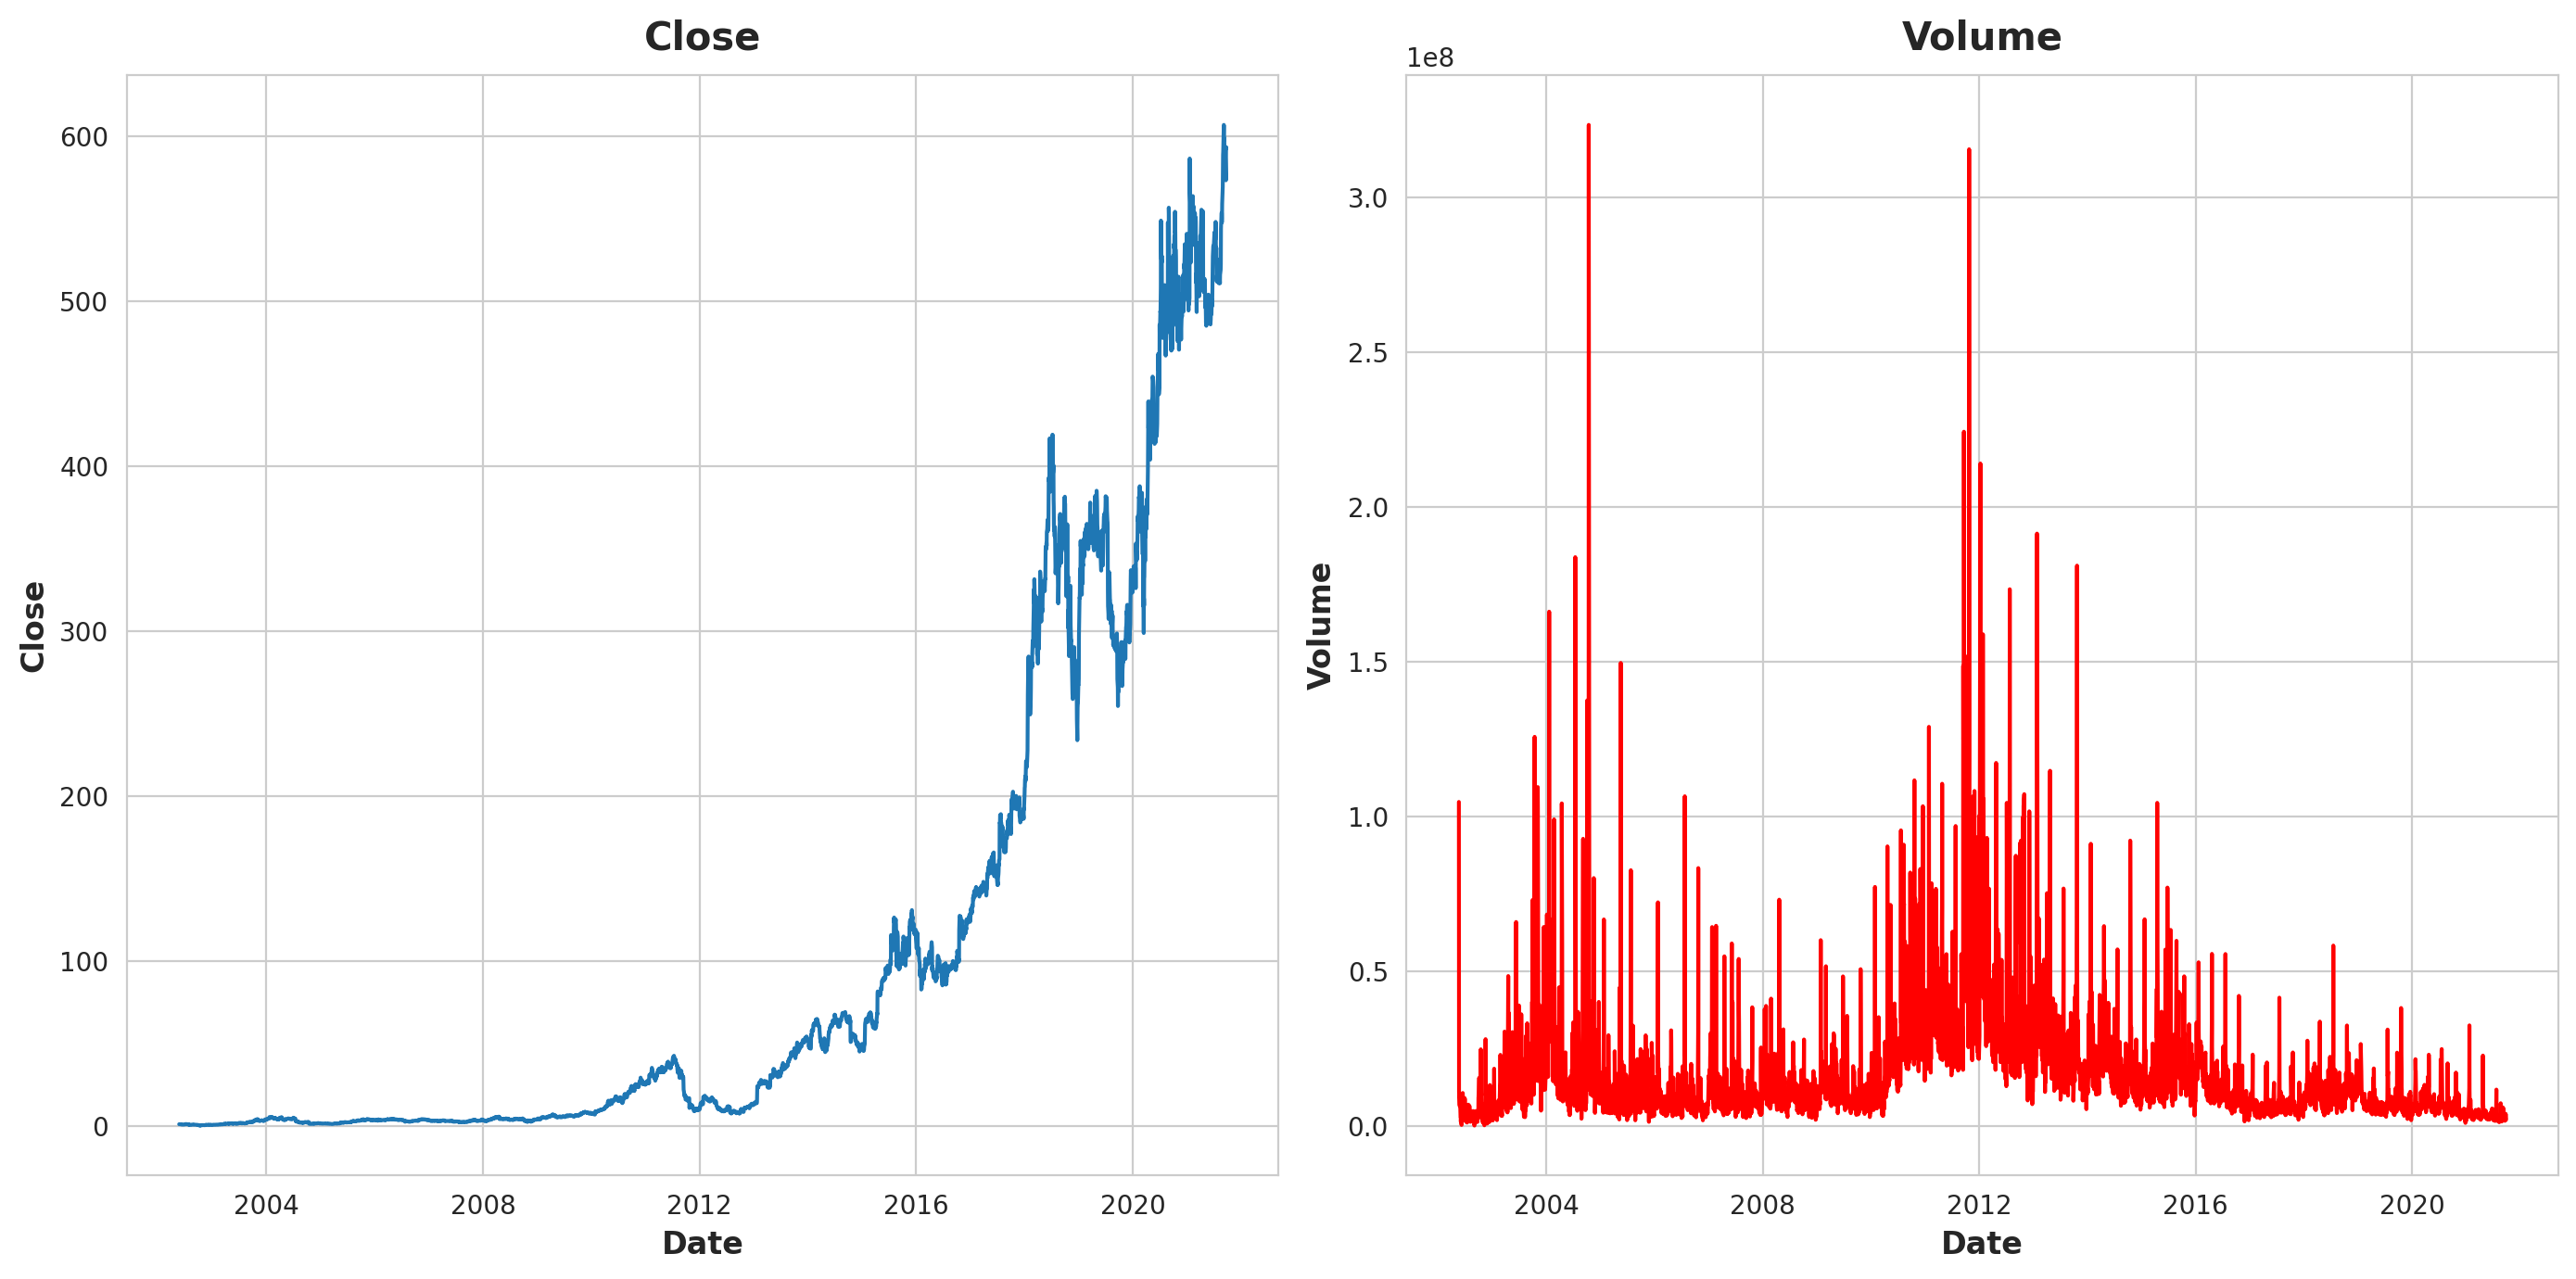

In [201]:
#All the data
fig, axes = plt.subplots(1, 2, figsize = (14, 7))
sns.lineplot(net_history, x=net_history.Date, y=net_history.Close, ax=axes[0])
axes[0].set_title("Close")
sns.lineplot(net_history, x=net_history.Date, y=net_history.Volume, ax=axes[1], color="red")
axes[1].set_title("Volume")

In [202]:
#2018-2021 data
net_history_2018_2021 = net_history.loc[(net_history["Date"]>="2018-01-01")]
net_history_2018_2021.head()

,Date,Open,High,Low,Close,Volume
3930,2018-01-02,196.100006,201.649994,195.419998,201.070007,10966900
3931,2018-01-03,202.050003,206.210007,201.500000,205.050003,8591400
3932,2018-01-04,206.199997,207.050003,204.000000,205.630005,6029600
3933,2018-01-05,207.250000,210.020004,205.589996,209.990005,7033200
3934,2018-01-08,210.020004,212.500000,208.440002,212.050003,5580200


In [203]:
net_history_2018_2021.describe(exclude='datetime64')

,Open,High,Low,Close,Volume
count,940.000000,940.000000,940.000000,940.000000,9.400000e+02
mean,397.144085,403.243053,390.880904,397.296861,7.826532e+06
std,96.144655,96.936786,95.315862,96.102512,5.202049e+06
min,196.100006,201.649994,195.419998,201.070007,1.144000e+06
25%,321.847496,327.247505,315.757500,321.097504,4.393375e+06
50%,366.895004,371.339996,361.240005,366.860001,6.276950e+06
75%,494.902496,502.212494,487.377502,493.919998,9.696300e+06
max,606.469971,615.599976,596.549988,606.710022,5.841040e+07


Text(0.5, 1.0, 'Volume trades over time')

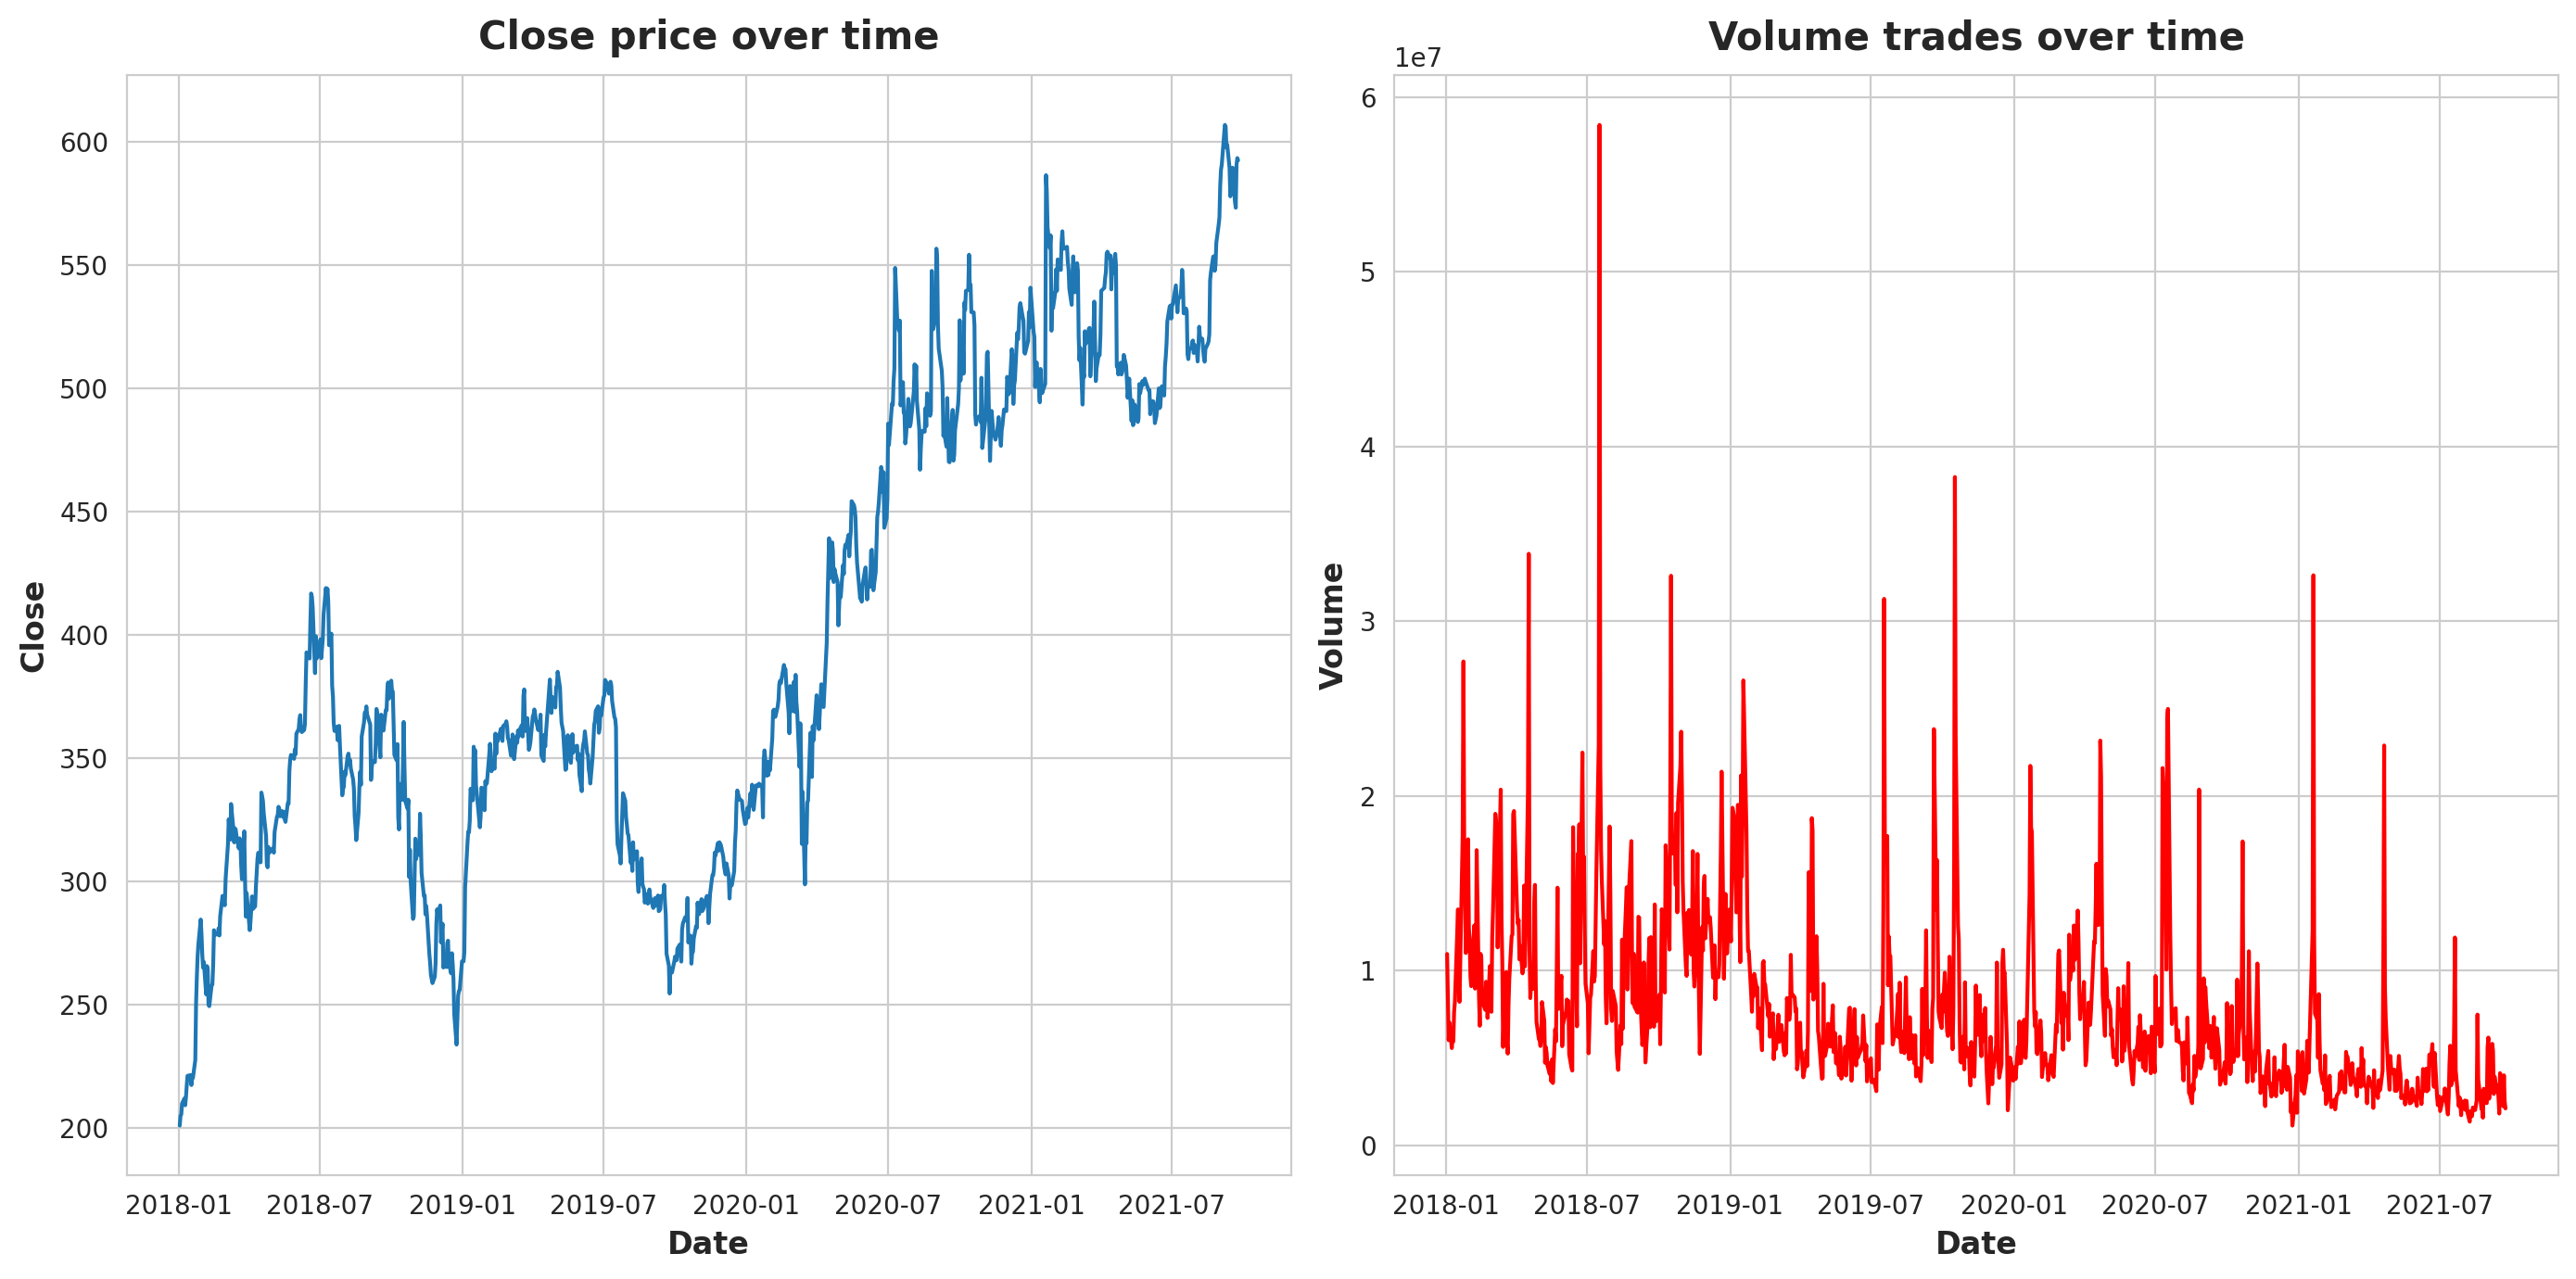

In [204]:
fig, axes = plt.subplots(1, 2, figsize = (14, 7))
sns.lineplot(net_history_2018_2021, x=net_history_2018_2021.Date, y=net_history_2018_2021.Close, ax=axes[0])
axes[0].set_title("Close price over time")
sns.lineplot(net_history_2018_2021, x=net_history_2018_2021.Date, y=net_history_2018_2021.Volume, ax=axes[1], color="red")
axes[1].set_title("Volume trades over time")